In [1]:
import numpy as np
from scipy import linalg as la
from os import walk
from scipy.ndimage import imread
from matplotlib import pyplot as plt
from random import sample

%matplotlib inline

In [2]:
def plot(img, w=200, h=180):
    """Helper function for plotting flattened images."""
    plt.imshow(img.reshape((w,h)))
    plt.show()

In [3]:
# Problem 1
def getFaces(path="./faces94"):
    """Traverse the directory specified by 'path' and return an array containing one column vector per subdirectory.
    For the faces94 dataset, this gives an array with just one column for each face in the dataset.
    Each column corresponds to a flattened grayscale image.
    """
    # Traverse the directory and get one image per subdirectory.
    faces = []
    for (dirpath, dirnames, filenames) in walk(path):
        for f in filenames:
            if f[-3:]=="jpg":          # only get jpg images
                 # Load the image, convert it to grayscale, and flatten it into vector.
                faces.append(imread(dirpath+"/"+f).mean(axis=2).ravel())
                break
    # Put all face vectors column-wise into a matrix.
    return np.transpose(faces)

(36000, 153)


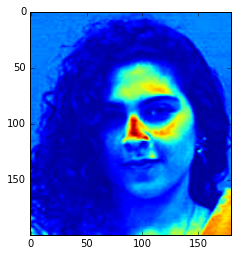

In [4]:
A = getFaces()
print A.shape
plot(A[:,4])

In [5]:
# Problems 2, 3, 4, 5, 6
class FacialRec:
    """
    Attributes:
        F
        mu
        Fbar
        U
    """
    def __init__(self,path):
        self.initFaces(path)
        self.initMeanImage()
        self.initDifferences()
        self.initEigenfaces()
    def initFaces(self, path):
        self.F = getFaces(path)
    def initMeanImage(self):
        self.mu = np.sum(self.F, axis=1)/float(self.F.shape[1])
    def initDifferences(self):
        self.Fbar = self.F - np.vstack(self.mu)
    def initEigenfaces(self):
        U, e, Vh = la.svd(self.Fbar, full_matrices=False)
        self.U = U
    def project(self, A, s=38):
        return np.dot(self.U[:,:s-1].T, A)
    def findNearest(self, image, s=38):
        """Project Fbar, producing a matrix whose columns are f-hat"""
        # Fhat =
        """Shift 'image' by the mean and project, producing g-hat"""
        # ghat =
        """For both Fhat and ghat, use your project function from the previous problem.
        Return the index that minimizes ||fhat_i - ghat||_2."""
        Fhat = self.project(self.Fbar, s)
        ghat = self.project(image - np.vstack(self.mu), s)
        return np.argmin(np.linalg.norm(Fhat - ghat, axis=0))

In [6]:
def sampleFaces(n_tests,path = "./faces94"):
    """Return an array containing a sample of n_tests images contained
    in the path as flattened images in the columns of the output.
    """
    files = []
    for (dirpath, dirnames, filenames) in walk(path):
        for f in filenames:
            if f[-3:]=="jpg": # only get jpg images
                files.append(dirpath+"/"+f)
    #Get a sample of the images
    test_files = sample(files, n_tests)
    #Flatten and average the pixel values
    images = np.array([imread(f).mean(axis=2).ravel() for f in test_files]).T
    return images

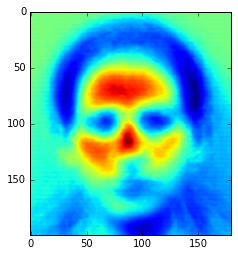

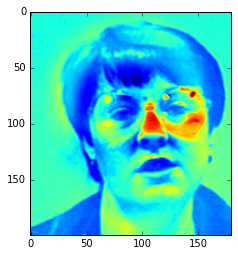

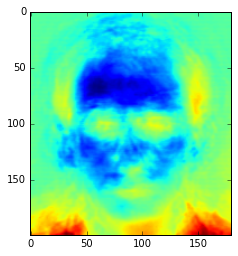

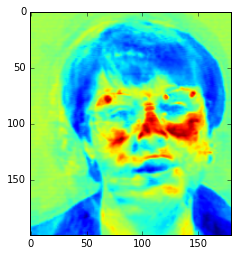

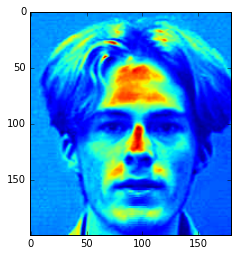

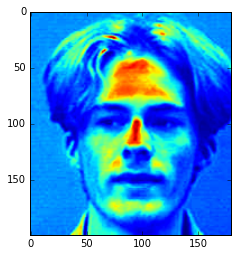

In [7]:
A = FacialRec("./faces94")
plot(A.mu)
plot(A.Fbar[:,0])
plot(A.U[:,0])

face = A.Fbar[:,0]
proj = A.project(face, 19)
b = np.dot(A.U[:,:18], proj)+A.mu
plot(b)

test = sampleFaces(1)
plot(test)

index = A.findNearest(test, s=75)
plot(A.F[:,index])

# Run tests on Multiple Faces

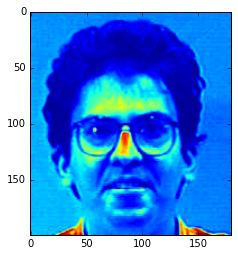

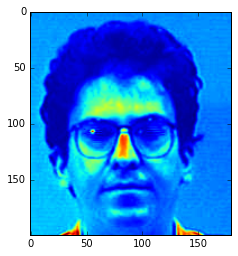

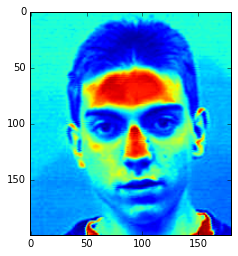

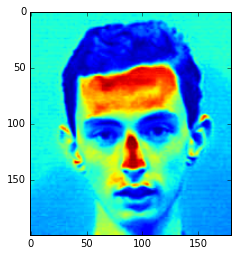

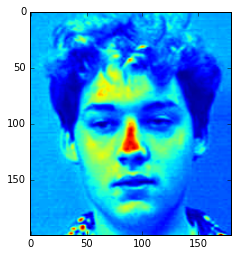

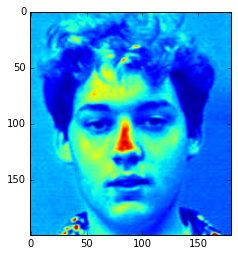

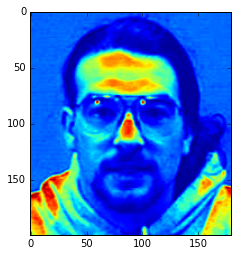

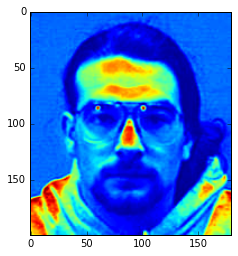

In [9]:
test = sampleFaces(4)
m,n = np.shape(test)
t = []
index = []

for x in xrange(n):
    plot(test[:,x])
    
    t.append(test[:,x].reshape((36000,1)))

    plot(A.F[:,A.findNearest(t[x])])